# Roteiro de estudo com exercícios

## **P11.10**

$$
G(s) = \frac{1}{s^2}
$$

$$
x_1(t) = y(t)
$$

$$
u = -2x_2-x_1
$$

*Solução:*

$$
\dot{\mathbf{x}} = \left[\begin{array}{cc}
0&1\\0&0\end{array}\right]\mathbf{x} + \left[\begin{array}{cc}
0\\1\end{array}\right]u
$$

$$
\mathbf{K} = \left[\begin{array}{c} 1 &2 \end{array}\right]
$$

Equação característica: $|s\mathbf{I-A+BK}|= (s+1)^2$ 

Resolvendo a equação para as condições $x_1(0)=0$ e $x_2(0)=1$:
$$\begin{align}
\dot{\mathbf{x}} &= \left[\begin{array}{cc}
0&1\\-1&-2\end{array}\right]\mathbf{x}\\
\Rightarrow \mathbf{X}(s)&= \left[\begin{array}{cc}
s&-1\\1&s+2\end{array}\right]^{-1}\mathbf{x}(0)\\
\Rightarrow X_1(s)&= \frac{1}{(s+1)^2} \Rightarrow x_1(t) = t\,e^{-t}u_0(t)\\
\Rightarrow X_2(s)&= \frac{s}{(s+1)^2} \Rightarrow x_2(t) = (1-t)\,e^{-t}u_0(t)
\end{align}$$

**Proposta de estudo:** 

Verifique todos os resultados  
Obtenha os resultados usando Python  
Utilize $G(s)=\frac{1}{(s+a)^2}$, com $a$ aleatório.  
Randomize $\mathbf{K}$ e as condições iniciais. 

## **P11.11**

$$
    G(s) = \frac{1}{s^2+5s+4}
$$

$$
t_s^{2\%} \leq 1,\quad M_p=1\%
$$

In [1]:
import numpy as np
import control as ct
from numpy import log,sqrt,pi

In [115]:
A = np.array([[-5,-4],[1,0]])
B = np.array([[1],[0]])

In [116]:
Mp = 1e-2
ts = 1
xi = -log(Mp)/sqrt(pi**2+log(Mp)**2)
sigma = -log(0.02)/ts
wn = sigma/xi
s = -sigma + 1j*wn*sqrt(1-xi**2)
p = [s, np.conjugate(s)]
p

[(-3.912023005428146+2.668735842145727j),
 (-3.912023005428146-2.668735842145727j)]

In [117]:
K = ct.acker(A,B,p)
print(K)

[[ 2.32404601 18.42607499]]


**Estudo:**
- Explique o código
- Refaça com critérios de projeto diferentes, mantendo o sistema. Analise o que ocorre com os ganhos e justifique.
- Refaça o projeto com perturbações no sistema.. Verifique o que acontece com os ganhos. 

## **P11.12**

*Solução:*

In [118]:
den = np.convolve(np.poly([0,0,-1]),[1,2,2])
num = 10
G = ct.tf(num,den)
G

TransferFunction(array([10]), array([1., 3., 4., 2., 0., 0.]))

In [119]:
sys = ct.tf2ss(G)
print(sys)

A = [[-3. -4. -2. -0. -0.]
     [ 1.  0.  0.  0.  0.]
     [ 0.  1.  0.  0.  0.]
     [ 0.  0.  1.  0.  0.]
     [ 0.  0.  0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]
     [0.]
     [0.]]

C = [[ 0.  0.  0.  0. 10.]]

D = [[0.]]



In [120]:
np.linalg.det(ct.ctrb(sys.A,sys.B))

1.0

In [121]:
np.linalg.det(ct.obsv(sys.A,sys.C))

100000.0000000002

Sistema controlável e observável

**Estudo:**
- Explique o código
- O que seria necessário para o sistema perder controlabilidade ou observabilidade?
- Exemplifique e demonstre um caso em que a controlabilidade ou a observabilidade é perdida

## **P11.13**

In [122]:
import sympy as sp

In [123]:
k, s = sp.symbols(['k','s'])
G = k/(s*(+70))
sol = sp.solve(sp.Eq((s*G).subs(s,0),35),k)


In [124]:
num = float(k.subs(k,sol[0]))
den = np.poly([0,-70])
G = ct.tf(num,den)
G

TransferFunction(array([2450.]), array([ 1., 70.,  0.]))

In [125]:
xi = 1/sqrt(2)
ts = 0.11
sigma = log(0.02)/ts
wn = sigma/xi
s = -sigma+1j*wn*sqrt(1-xi**2)
p = [s, np.conjugate(s)]
p

[(35.56384550389224-35.563845503892246j),
 (35.56384550389224+35.563845503892246j)]

In [126]:
K = ct.acker(sys.A,sys.B,p)
K

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -7.11276910e+01,  2.52957421e+03]])

**Estudo**

- Explique o código
- Randomize o sistema, sem alterar os critérios.
- O que seria necessário fazer para diminuir os ganhos?
- Simule uma resposta rampa para esse sistema e confira se o resultado para $K_v$ é coerente. 

## **P11.14**

Tente resolver solo

## **P11.15**

In [127]:
A = np.diag([-1, -2,-3])
B = np.array([[1,1,0]]).T
C = np.array([[1,0,2]])

In [128]:
from numpy.linalg import det, inv

In [129]:
det(ct.ctrb(A,B))

0.0

In [130]:
det(ct.obsv(A,C))

0.0

Sistema não-controlável e não-observável

**Estudo**:
- A resposta é intuitivamente óbvia. Por quê?
- O que seria necessário para o sistema ser controlável ou observável?

## **P11.17**

In [131]:
from sympy import ImmutableMatrix as matriz
a,s = sp.symbols(['a','s'])
G = (s+a)/(s**4+5*s**3+10*s**2+10*s+4)
A = matriz([[-5,-10,-10,4],[1,0,0,0],[0,1,0,0],[0,0,1,0]])
B = matriz([[1,0,0,0]]).T
C = matriz([[0,0,1,a]])


In [132]:
Obs = matriz(sp.BlockMatrix([[C],[C@A],[C@A@A],[C@A@A@A]]))
Obs.det()

a**4 - 5*a**3 + 10*a**2 - 10*a - 4

In [133]:
sol = sp.solve(Obs.det())

In [134]:
[x.evalf() for x in sol]

[1.19576674823247 - 1.78788003838438*I,
 1.19576674823247 + 1.78788003838438*I,
 2.90599245353874,
 -0.297525950003686]

O sistema é não observável se $a\approx 2.906$ ou $a\approx -0.2975$.

**Estudo:**

- Repita a análise usando forma canônica de observador
- Por que não foi verificada a matriz de controlabilidade também?
- Repita a análise posicionando $a$ em outro local da função de transferência e substituindo no numerador por um valor arbitrário. 

## **P11.19**

As equações de estado são:

$$\begin{align}
\dot{x}_1 &= -2x_1+r+3x_2\\
\dot{x}_2 &= x_1+r\\
y &= x_1
\end{align}$$

In [135]:
A = np.array([[-2,3],[1,0]])
B = np.array([[1,1]]).T
C = np.array([[1,0]])

In [136]:
det(ct.ctrb(A,B))

0.0

In [137]:
det(ct.obsv(A,C))

2.9999999999999996

Sistema controlável e observável

**Estudo:**

- Repita o problema mudando valores numéricos do sistema
- Repita o problema mudando as linhas do diagrama, a posição ou sinais de entrada de somadores.

## **P11.20**

In [138]:
A = matriz([[-0.05, -6, 0, 0],
            [-1e-3, -0.15, 0, 0],
            [1,0,0,13],
            [0,1,0,0]])
B = matriz([[-0.2, 0.03,0,0]]).T

$$
\begin{align}
\begin{array}{c|ccc}
s^4 & 1 & \alpha_2 & \alpha_0\\
s^3 & \alpha_3 & \alpha_1 & 0\\
s^2 & b_1 & \alpha_0 & 0\\
s^1 & b_2 & 0\\
s^0 & \alpha_0
\end{array}
\end{align}
$$

$$
\begin{align*}
    \alpha_2 &=0.0015-0.21k_1-0.2k_3\\
    \alpha_3 &=0.2-0.2k_1\\
    \alpha_1 &=0.18k_3\\
    \alpha_0 &=0.0221k_3\\
    b_1 &=\frac{\alpha_3\alpha_2-\alpha_1}{\alpha_3}\\
    b_2 &=\frac{\alpha_1b_1-\alpha_3\alpha_0}{b_1} 
\end{align*}
$$

## **P11.22**

<center> <img src='./figs/P11.22.svg'> </center>

$$
\begin{align*}
    \dot{x}_1 &= -0.4x_1+x_2\\
    \dot{x}_2 &= u - x_1
\end{align*}
$$


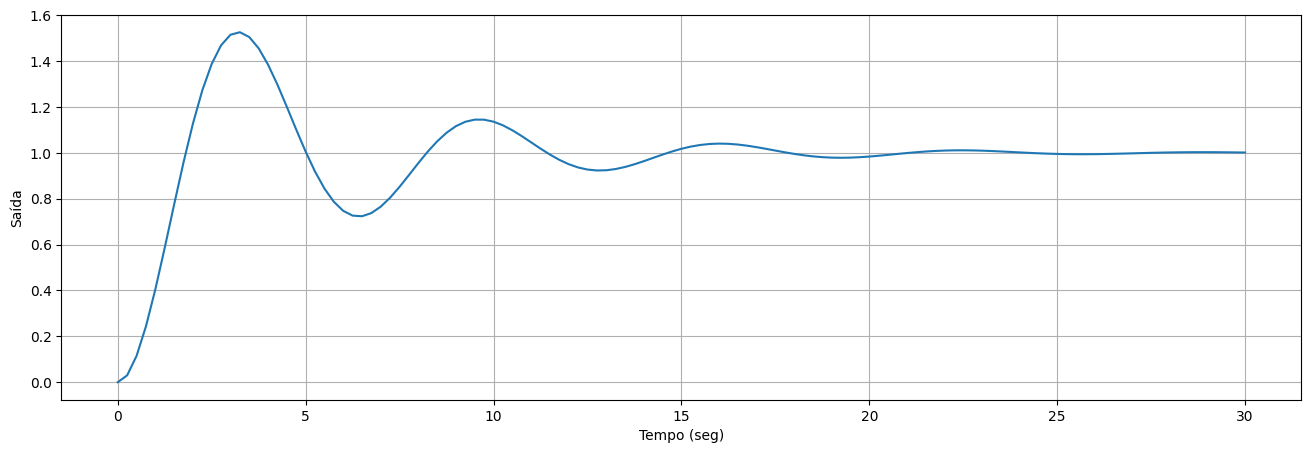

In [171]:
A = np.array([[-0.4, 1],[-1,0]])
B = np.array([[0,1]]).T
C = np.array([[1,0]])
sys = ct.ss(A,B,C,0)
resp = ct.step_response(sys,30)
from matplotlib import pyplot as plt
plt.figure(figsize=(16,5))
plt.plot(resp.t,resp.outputs)
plt.grid()
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída')
plt.show()

In [155]:
ct.damp(sys)

_____Eigenvalue______ Damping___ Frequency_
      -0.2   +0.9798j        0.2          1
      -0.2   -0.9798j        0.2          1


(array([1., 1.]), array([0.2, 0.2]), array([-0.2+0.9797959j, -0.2-0.9797959j]))

In [172]:
#b
Mp = 5e-2
xi = -log(Mp)/sqrt(pi**2+log(Mp)**2)
ts = 1.35
sigma = -log(2e-2)/ts
wn = sigma/xi
s = -sigma+1j*wn*sqrt(1-xi**2)
p = [s, np.conjugate(s)]
K = ct.acker(A,B,p)
print('K = ', K)
N = 1/(C@inv(B@K-A)@B)[0,0]
print('N = ', N)


K =  [[14.47381123  5.39558964]]
N =  17.63204708931469


In [157]:
# c
Amf = A-B@K
Bmf = B*N
Cmf = C
mf = ct.ss(Amf,Bmf,Cmf,0)
resp_mf = ct.step_response(mf,5)
ct.damp(mf)

_____Eigenvalue______ Damping___ Frequency_
    -2.898    +3.039j     0.6901      4.199
    -2.898    -3.039j     0.6901      4.199


(array([4.19905312, 4.19905312]),
 array([0.69010673, 0.69010673]),
 array([-2.89779482+3.03888668j, -2.89779482-3.03888668j]))

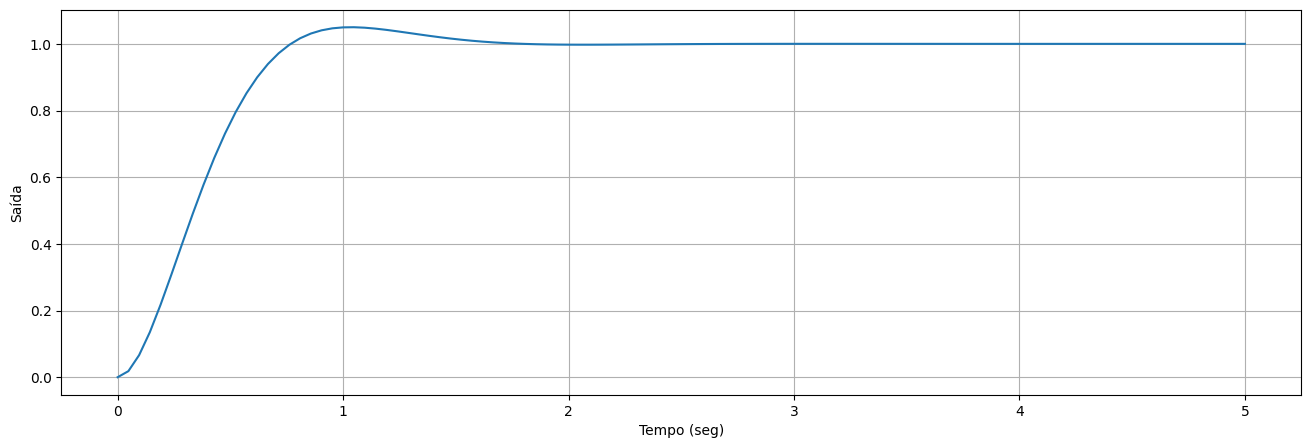

In [158]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,5))
plt.plot(resp_mf.t,resp_mf.outputs)
plt.grid()
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída')
plt.show()

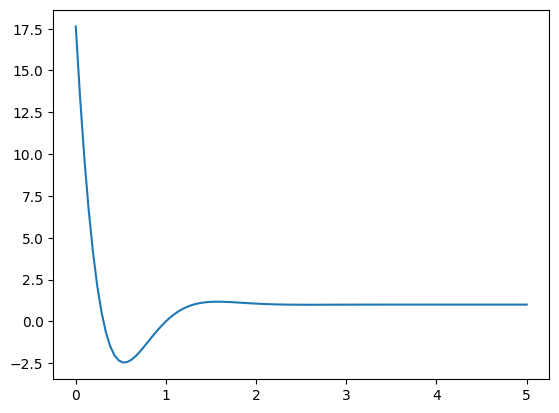

In [178]:
x = resp_mf.states
r = np.ones(resp_mf.t.size)
u = -K@x + N*r
plt.plot(resp_mf.t, u.T)

**Estudo**
- Desenhe o diagrama de blocos que representa a estratégia de controle implementada
- Calcule e analise o sinal de controle da simulação executada
- Como seria o projeto caso o sistema dado fosse considerado em malha aberta? Quais seriam as diferenças de projeto e de resultado?

## **PA11.1**

Vamos fazer o projeto para considerando a entrada $U(s)/K$, assim ele fica independente de $K$, que pode ser ajustado em malha fechada, caso necessário. As equações de estado ficam:
$$
\begin{align*}
    \dot{x}_1 &= x_2\\
    \dot{x}_2 &= 2x_3 - x_2\\
    \dot{x}_3 &=u - 4x_3
\end{align*}
$$

In [179]:
A = np.array([[0,1,0],[0,-1,2],[0,0,-3]])
B = np.array([[0,0,1]]).T
C = np.array([[1,0,0]])

In [180]:
np.linalg.eig(A)

(array([ 0., -1., -3.]),
 array([[ 1.        , -0.70710678,  0.22941573],
        [ 0.        ,  0.70710678, -0.6882472 ],
        [ 0.        ,  0.        ,  0.6882472 ]]))

In [160]:
Mp = 3e-2
xi = -log(Mp)/sqrt(pi**2+log(Mp)**2)
wn = 3   # Arbitrário, com base nos pólos de MA
sigma = xi*wn
s = -sigma + 1j *wn* sqrt(1-xi**2)
p = [s, np.conjugate(s), -5*sigma]
K = ct.acker(A,B,p)
print(K)

[[50.27423889 22.14251687 11.64087432]]


**Estudo**
- Simule o sistema em malha fechada para uma entrada degrau
- Por que o erro de regime não é zero se o sistema possui um integrador?
- Proponha uma mudança no projeto para zerar o erro de regime
- Randomize os parâmetros do sistema e repita a solução


## **PA11.2**

Tente resolver solo

**Estudo**
- Utilize formas de controlador e de observador
- Repita um projeto para cancelar pelo menos um zero do sistema
- Randomize o problema e repita. 

## **PA11.3**

Tente resolver solo. A solução é trivial.

## **PA11.4**

Tente resolver solo.

**Estudo**
- Estude a controlabilidade do sistema.

## **PA11.5**

Equações de estado:

$$
\begin{align*}
    \dot{x}_1 &= x_2-3x_1\\
    \dot{x}_2 &= x_3-2x_2\\
    \dot{x}_3 &= u-4x_1\\
    y &= x_1
\end{align*}
$$

In [161]:
A = matriz([[-3,1,0],[0,-2,1],[-4,0,0]])
B = matriz([[0,0,1]]).T
C = matriz([[1,0,0]])
k2,k3,s = sp.symbols(['k_2','k_3','s'])
a,b = sp.symbols(['a','b'])
p = [-4,-5,-b]

In [162]:
alfa = sp.prod([s-p[n] for n in range(len(p))])
alfa = alfa.expand()
alfa

b*s**2 + 9*b*s + 20*b + s**3 + 9*s**2 + 20*s

In [163]:
K = matriz([[1,k2,k3]])
Amf = A-B@K
alfa_mf = Amf.charpoly(s).as_expr()
alfa_mf

3*k_2 + 6*k_3 + s**3 + s**2*(k_3 + 5) + s*(k_2 + 5*k_3 + 6) + 5

In [164]:
eqs = [sp.Eq(alfa_mf.coeff(s,n),alfa.coeff(s,n)) for n in [0,1,2]]
for n in range(len(eqs)): display(eqs[n])

Eq(3*k_2 + 6*k_3 + 5, 20*b)

Eq(k_2 + 5*k_3 + 6, 9*b + 20)

Eq(k_3 + 5, b + 9)

In [165]:
sol = sp.solve(eqs)
sol

{b: 11/2, k_2: 16, k_3: 19/2}

Como $b=11/2=5.5$, a solução é válida nas condições do problema. 

In [166]:
# Determinação de kp
Kp = 1/(C @ (B@K-A).subs(sol).inv() @ B)[0]
Kp

110

**Estudo**
- Explique o código
- Caso o valor de $b$ não estivesse nas condições do problema, o que poderia ser feito? Demonstre